Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Simon Andren"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomly built BSTs

## Part A. Average number of comparisons when searching

## Question 0 [time estimate: 1 minute] 

Paste in the working code from last session's PCW for the class Node, which contains the methods for insertion, searching, and deletion. 



In [2]:
#Code from PCW

class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node

    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def to_string(self): 
        print('self.data', self.data)
        root=self
        if not root: 
            return 'Nil'
        else: 
            r = root.r_child.to_string() if root.r_child else 'Nil'
            l = root.l_child.to_string() if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'
    
    
    def search(self, value):
        if self == None or value == self.data:
            return self
        elif value < self.data and self.l_child:
            return self.l_child.search(value)
        elif value > self.data and self.r_child:
            return self.r_child.search(value)
    
    def transplant(self, u,v):
        if u.parent==None:
            u = v
        elif u == u.parent.l_child:
            u.parent.l_child = v
        else:
            u.parent.r_child = v
        if v != None:
            v.parent = u.parent
            
    def delete(self, z):
        z = self.search(z)
        if z==None:
            return None
        if z.l_child == None:
            self.transplant(z, z.r_child)
        elif z.r_child == None:
            self.transplant(z, z.l_child)
        else:
            y = z.r_child.minimum()
            if not y.parent == z:
                self.transplant(y, y.r_child)
                y.r_child = z.r_child
                y.r_child.parent = y
            self.transplant(z, y)
            y.l_child = z.l_child
            y.l_child.parent = y
    
    def inorder(self, lst=[]):
        
        if self.l_child:
            self.l_child.inorder(lst)
        lst.append(self.data)
        if self.r_child:
            self.r_child.inorder(lst)
        
        return lst
    


## Question 1 [time estimate: 5 minutes]

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [3]:
def depth(root, node):
    """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
    """
    #define the variables for height and a whilestopper
    height = 0
    ws = 0
    
    if node == None:
        print("The node didn't exist")
        return
    
    #if the node is not the same as the root
    while node != root and ws < 10000:
        
        #make the parent of the node, the node
        node = node.parent
        
        height += 1
        
        ws += 1
    return height
    #raise NotImplementedError()
    
bst = None

my_Nodes = [9, 3, 5, 1,4,5,8,23,6,11,15]
for x in [Node(_) for _ in my_Nodes]:
    #print("###################")
    #print('Inserting the following node: ', x.data)
    if not bst:
        bst = x
    else:
        bst = bst.insert(x)
    #print(bst.to_string())

depth(bst, bst.search(100))

The node didn't exist


In [4]:
# Testing code 
import math
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
#         insert(bst, node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [6]:
def avg_cmp(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    n : float
        Average number of comparisons
        
    """
    #This might not be the most efficient avg_comp function but it works I hope
    
    #Find all values in order for all the nodes in bst
    node_lst = bst.inorder()
    tot_comp = 0
    
    #loops through all the values, and appends the depth for each node to the root
    for node in node_lst:
        tot_comp += depth(bst, bst.search(node)) + 1
    
    return tot_comp/len(node_lst)
        
        
bst = None

my_Nodes = [9, 3, 5, 1,4,5,8,23,6,11,15]
for x in [Node(_) for _ in my_Nodes]:
    if not bst:
        bst = x
    else:
        bst = bst.insert(x)

print(avg_cmp(bst))

3.272727272727273


In [7]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 

## Question 1 [time estimate: 10 minutes]

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [8]:
def max_depth(bst):
    """
    Finds the maximum depth of node in a BST.
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    h : int
        The maximum depth in a BST
        
    """
    #if the subtree (bst) is empty return 0
    if bst == None:
        return -1
    
    #return the maximum depth of the two subtrees + 1 for the added level
    return max(max_depth(bst.l_child),max_depth(bst.r_child)) + 1



bst = None

my_Nodes = [9, 3, 5, 1,4,5,8,23,6,11,15]
for x in [Node(_) for _ in my_Nodes]:
    if not bst:
        bst = x
    else:
        bst = bst.insert(x)
    
print(max_depth(bst))

5


In [9]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [10]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Parameters
    ----------
    bst
        A Node, root of the BST
    
    Returns
    -------
    avg_d : float
        Average depth of the BST
        
    """
    ave_dep = avg_cmp(bst) - 1
    
    return ave_dep

    #raise NotImplementedError()
print(avg_depth(bst))

2.272727272727273


In [11]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3 [time estimate: 10 minutes]
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

Both average depth and maximum depth increase logarithmic. The maximum depth will however always be above the average depth.

In [12]:
import random

avedep_max_dep = []

for numb in range(50,5001,100):
    my_Nodes = [i for i in range(1,numb+1)]
    random.shuffle(my_Nodes)
    bst = None
    for x in [Node(_) for _ in my_Nodes]:
        if not bst:
            bst = x
        else:
            bst = bst.insert(x)
    
    avedep_max_dep.append((numb, avg_depth(bst),max_depth(bst)))


## Question 4 [time estimate: 7 minutes]

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [13]:
# YOUR CODE HERE
#raise NotImplementedError()

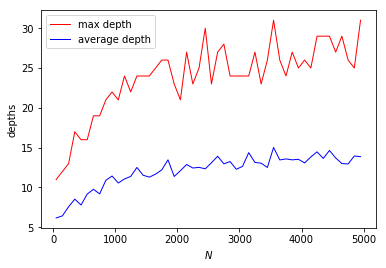

In [15]:
import matplotlib.pyplot as plt

N = [item[0] for item in avedep_max_dep]
max_depths = [item[2] for item in avedep_max_dep]
avg_depths = [item[1] for item in avedep_max_dep]

plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()